In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
beam = np.load('/Users/ruby/Astro/LWA_beams/beamJones_28.68.npz')
print(beam.files[0])
print(np.shape(beam['J']))
beam = beam['J']

J
(2, 2, 4096, 4096)


In [4]:
# Get rid of pixels with nans
bad_pixels = np.where(np.isnan(np.sum(np.abs(beam), axis=(0,1))))
for pix_ind in range(len(bad_pixels[0])):
    beam[:, :, bad_pixels[0][pix_ind], bad_pixels[1][pix_ind]] = np.nan + 1j*np.nan

In [5]:
use_cmap = matplotlib.cm.get_cmap('Spectral')
use_cmap.set_bad(color='whitesmoke')
plt.rcParams.update({'mathtext.default':  'regular'})

<ipython-input-5-682272893560>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral"))
  use_cmap.set_bad(color='whitesmoke')


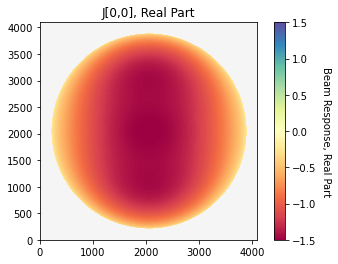

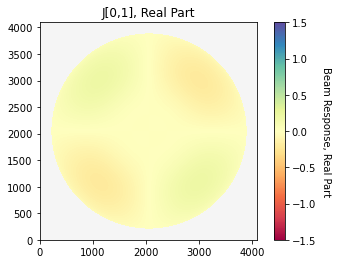

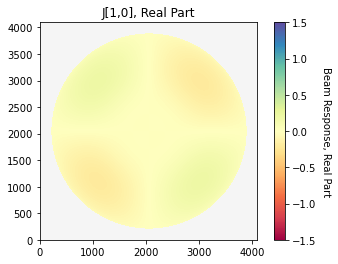

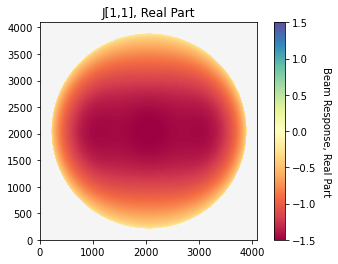

In [6]:
for ind1 in range(2):
    for ind2 in range(2):
        fig, ax = plt.subplots()
        plt.imshow(
            np.real(beam[ind1,ind2,:,:]), origin='lower',
            interpolation='none',
            vmin=-1.5, vmax=1.5,
            cmap=use_cmap
        )
        cbar = plt.colorbar()
        cbar.ax.set_ylabel(
            'Beam Response, Real Part', rotation=270, labelpad=15
        )
        plt.title(f'J[{ind1},{ind2}], Real Part')

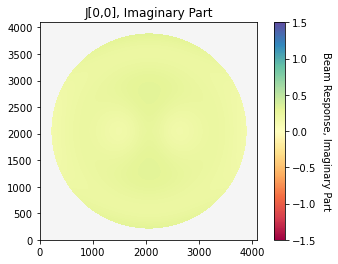

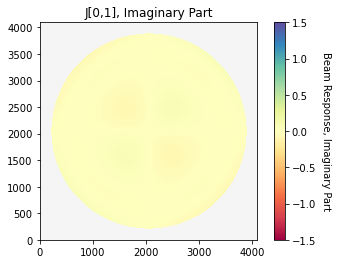

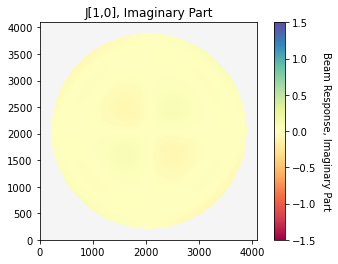

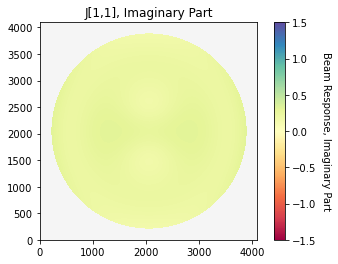

In [7]:
for ind1 in range(2):
    for ind2 in range(2):

        fig, ax = plt.subplots()
        plt.imshow(
            np.imag(beam[ind1,ind2,:,:]), origin='lower',
            interpolation='none',
            vmin=-1.5, vmax=1.5,
            cmap=use_cmap
        )
        cbar = plt.colorbar()
        cbar.ax.set_ylabel(
            'Beam Response, Imaginary Part', rotation=270, labelpad=15
        )
        plt.title(f'J[{ind1},{ind2}], Imaginary Part')